### Random forest
- The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png">

## Types of random forest
##### Bootstrapping(With replacement and without replacement)
- Rows sampling
- Column(feature) sampling
- Combinning row & columns

##### Aggregation
- Qurey point: maximun voting
- Mean : In terms of mans

### Bais Variance And Random Forest
- We want to ML algo have low bais and low varience but they are inversely proportional to each other.
- L.B, H.V: Fully ground DT, SVM,KNN
- H.B, L.V: LR,

#### In R.F. get equaly noisy point is distributed in each algorithm, resulting in low varience

## Random forest Vs Bagging
 - Bagging base estimator in D.T. 
 - But in column sampling is happen in tree level(i.e. not repleation)
 - But in D.T.sampling happened in terms of node level(i.e. repetation occur and decission take place resulting in more randimness in algo)

### Hyper-parameter in Random foest:
##### parameter:
- n_estimater: no of d_trees default is 100
- Max_features: no of forest, auto, square, log
- Bootsrap: sapmling type repeat or not
- max sample : no of rowsgiven to each D_tree (50-200)

## Bagging Vs Random Forest

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [5]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [6]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.277146,-1.990375,3.496432,1.109899,1.105401,1
1,-1.173500,-1.188335,1.156741,-0.522140,-0.090941,1
2,-0.015635,-0.553828,-2.941528,-2.577393,-2.856396,1
3,0.000392,-0.690193,0.741759,0.135825,-1.314980,0
4,-0.109056,-1.689794,2.251631,2.525989,2.949411,0


In [17]:
bag = BaggingClassifier(max_features=2)

In [18]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

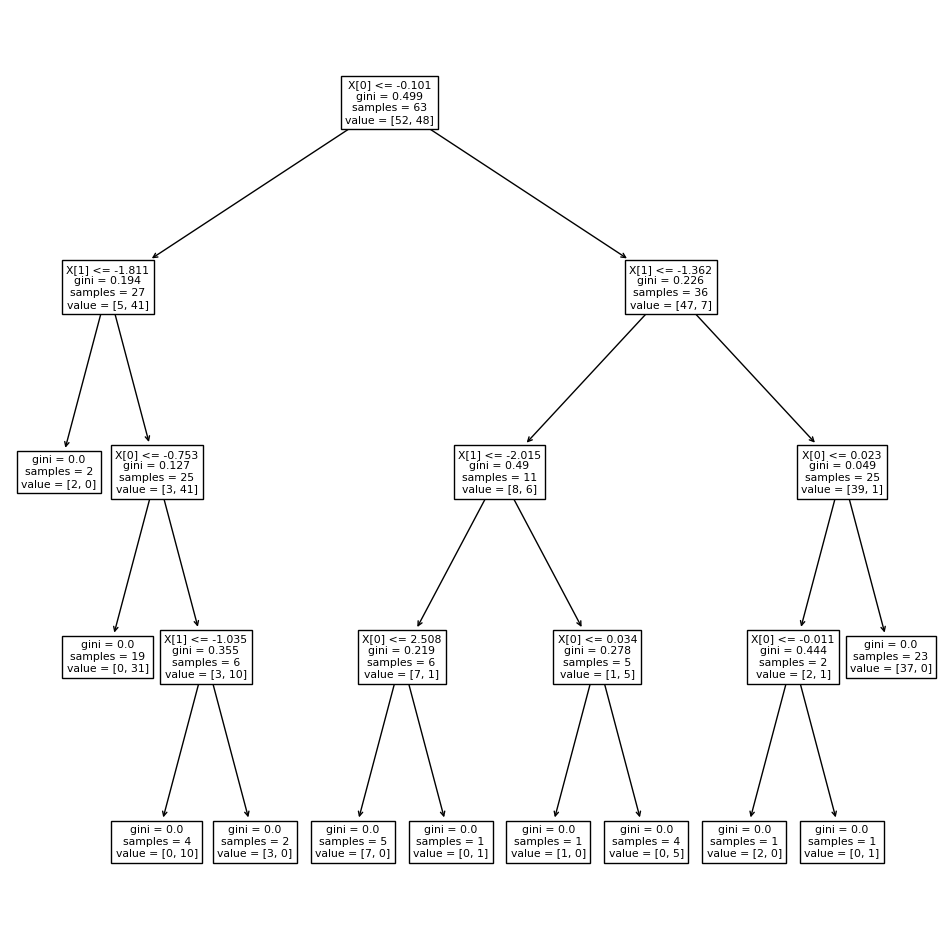

In [19]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [20]:
rf = RandomForestClassifier(max_features=2)

In [21]:

rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

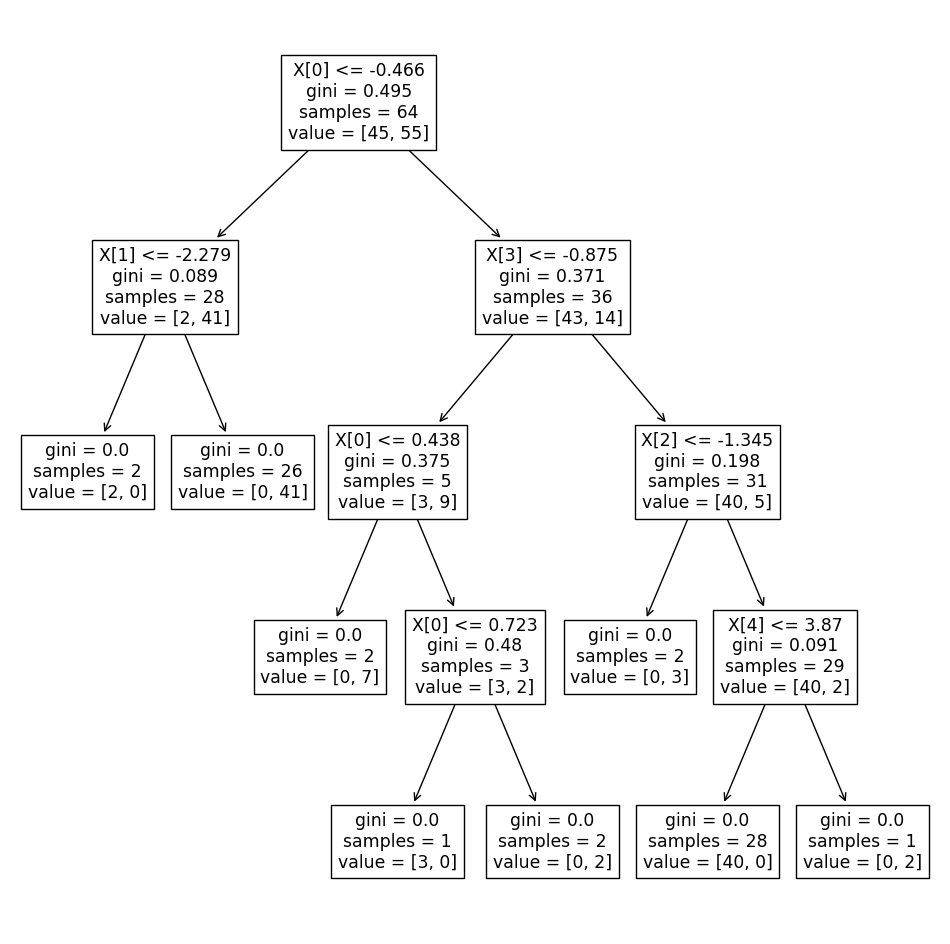

In [22]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

In [36]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [44]:
import random

In [45]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [46]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [47]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1180\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [48]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1180\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [49]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1180\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [50]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col4', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [51]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [52]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [53]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9, 'X[1] <= 0.097\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.2222222222222222, 0.7, 'X[1] <= -0.318\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.3333333333333333, 0.5, 'X[1] <= -0.114\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.7, 'X[0] <= 0.31\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.5, 'X[1] <= 0.496\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 0.295\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0

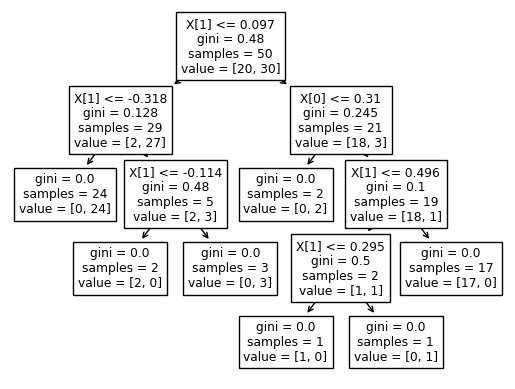

In [54]:
plot_tree(clf1)

[Text(0.4, 0.9285714285714286, 'X[1] <= -0.352\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.2, 0.7857142857142857, 'X[0] <= 0.706\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.7857142857142857, 'X[0] <= -0.875\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.5, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.6428571428571429, 'X[1] <= 1.604\ngini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.8, 0.5, 'X[1] <= 1.926\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.7, 0.35714285714285715, 'X[1] <= 1.746\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.21428571428571427, 'X[0] <= 0.536\ngini = 0.5\nsamples = 2\nvalue = [1, 

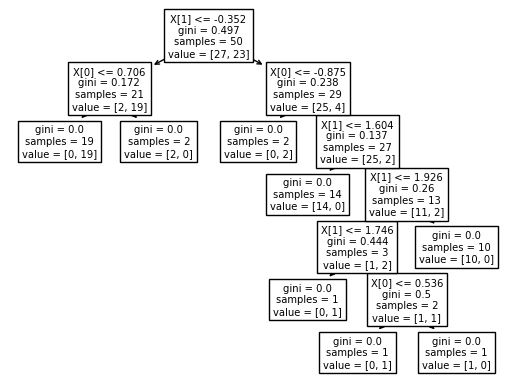

In [55]:
plot_tree(clf2)

[Text(0.38461538461538464, 0.9, 'X[0] <= -0.478\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.15384615384615385, 0.7, 'X[1] <= -2.298\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.6153846153846154, 0.7, 'X[1] <= -1.448\ngini = 0.291\nsamples = 34\nvalue = [28, 6]'),
 Text(0.38461538461538464, 0.5, 'X[1] <= -1.872\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.46153846153846156, 0.3, 'X[0] <= 0.09\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8461538461538461, 0.5, 'X[0] <= 0.208\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.7692307692307693, 0.3, 'X[1] <= -0.73\ngini 

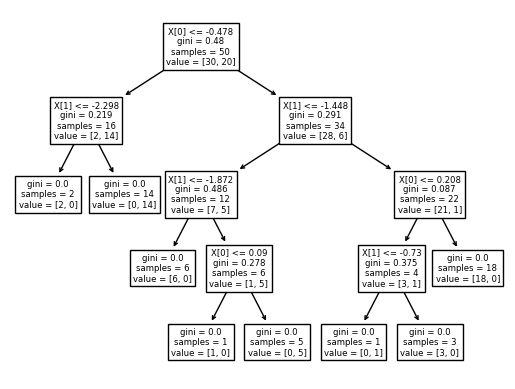

In [56]:
plot_tree(clf3)

In [59]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [60]:

clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [61]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [62]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [63]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
30,1.181451,-1.050694,-2.363355,-1.329368,-2.517965,1
52,1.988732,-1.335215,2.194787,1.058506,3.878922,0
94,1.923449,-2.078368,2.031405,0.768191,3.414310,0
55,0.639448,-1.388284,-2.201897,-0.178339,0.284849,1
96,1.962057,-1.556833,2.405260,2.818131,3.468416,0
6,-0.491522,-0.949847,-0.701682,-0.419818,0.916541,1
20,-1.113318,-1.537796,1.156361,-0.789891,-1.149580,1
73,-0.708176,-1.279503,1.935529,-0.523565,-1.170285,1
30,1.181451,-1.050694,-2.363355,-1.329368,-2.517965,1
54,3.101302,-1.285641,0.769890,1.981771,3.443381,0
